In [ ]:
import itertools

import pandas as pd
import numpy as np
import scipy.io as scio

%load_ext autoreload
%autoreload 2
import main

In [477]:
mat_data = scio.loadmat('ex4data1.mat')
X = pd.DataFrame(mat['X'])
y = pd.DataFrame(mat['y']) \
    .applymap(lambda x: x % 10) \
    .iloc[:, 0]
y_vec = y.apply(lambda l: pd.Series(main.to_activation(l, 10)))

mat_weights = scio.loadmat('ex4weights.mat')
Theta1 = np.array(mat_weights['Theta1'])
Theta2 = np.array(mat_weights['Theta2'])
# wtf with the order of rows here
Theta2 = np.roll(Theta2, 1, axis=0)
thetas = [Theta1, Theta2]

In [545]:
predictions = pd.DataFrame(main.run_network(thetas, X))
classes = predictions.apply(main.to_cls, axis='columns')

correct = classes[classes == y].count()
print('Accuracy: ', correct / len(X))

cost = main.network_cost(thetas, predictions, y_vec, 0)
print('Cost:', cost)

Accuracy:  0.9752
Cost: 0.2876293738642598


In [598]:
alpha = 1.5
epochs = 15
batch_size = 25
thetas_0 = main.init_weights([400, 25, 10], 10)
reg_param = 0.003
progress = []
new_thetas = None

# for new_thetas, cost in itertools.islice(main.gradient_descent(thetas_0, X, y_vec, alpha, reg_param), 200):
for cost, new_thetas in main.run_stochastic_descent(alpha, epochs, thetas_0, X, y_vec, reg_param, batch_size):
    progress.append(cost)

Epoch 1 completed
Epoch 2 completed
Epoch 3 completed
Epoch 4 completed
Epoch 5 completed
Epoch 6 completed
Epoch 7 completed
Epoch 8 completed
Epoch 9 completed
Epoch 10 completed
Epoch 11 completed
Epoch 12 completed
Epoch 13 completed
Epoch 14 completed
Epoch 15 completed


In [599]:
new_predictions = pd.DataFrame(main.run_network(new_thetas, X))
new_classes = new_predictions.apply(main.to_cls, axis='columns')

correct = new_classes[new_classes == y].count()
print('Accuracy: ', correct / len(X))

cost = main.network_cost(new_thetas, new_predictions, y_vec, 0)
print('Cost:', cost)

Accuracy:  0.8562
Cost: 0.8808217485328764


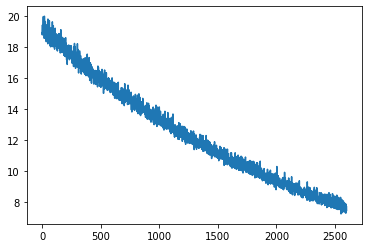

In [600]:
import matplotlib.pyplot as plt

plt.plot(progress[400:])
plt.show()

In [607]:
epsilon = 10e-4

deltas = list(main.backpropagate(new_thetas, X, y_vec, reg_param))
deltas_approx = main.gradient_approx(new_thetas, X, y_vec, reg_param, epsilon, [1], [0], range(new_thetas[1].shape[1]))
abs_diff = np.abs(deltas[1][0] - deltas_approx[1][0])
print('Average error, absolute:', np.mean(abs_diff))
print('Standard deviation:     ', np.std(abs_diff))
print('Average value, absolute:', np.mean(np.abs(deltas[1])))

Average error, absolute: 2.4861261227486836e-10
Standard deviation:      2.2166461717413582e-10
Average value, absolute: 0.0035343859436232296


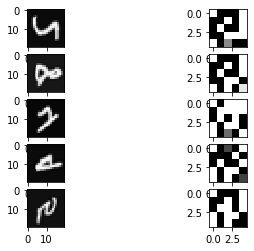

In [618]:
%matplotlib inline
import matplotlib.pyplot as plt

count = 5
# figsize=(11, 25)
fig = plt.figure()
for i in range(count):
    ax = fig.add_subplot(count, 2, 2*i + 1)
    index = y_vec.sample(1).index[0]
    number = X.iloc[index].values.reshape(20, 20)
    ax.imshow(number, cmap='gray')
    
    ax = fig.add_subplot(count, 2, 2*i + 2)
    activations = main.run_network(new_thetas, X.iloc[[index]], 1)
    number = np.reshape(activations.values, (5, 5))
    ax.imshow(number, cmap='gray')

plt.show()